# Line plots

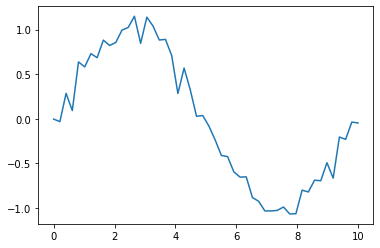

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cortical_networks as cn


time, ts = cn.make_syn_data(n=50, model='sine', f=.1)
plt.plot(time, ts)

As you can see `plt.plot` returns a line object, which contains a lot of information and allows us to manipulate our figure, so we can assign it to a variable to use it later or we can suppress the output as we have seen in previous session.

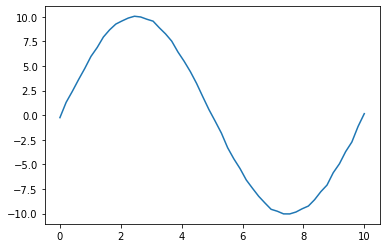

In [26]:
line = plt.plot(time, ts)

## line properties, markers

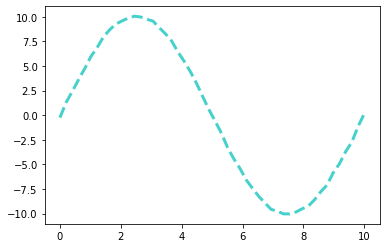

In [36]:
line = plt.plot(time, ts, linewidth=3, color='mediumturquoise', linestyle='--')

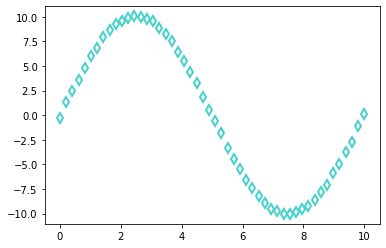

In [44]:
line_params = dict(linewidth=3, color='mediumturquoise', linestyle='',
                   marker='d', markersize=7, markerfacecolor='white', markeredgewidth=2)
line = plt.plot(time, ts, **line_params)

## limits, ticks, labels, title, spines

([<matplotlib.axis.XTick at 0x7fcc3f377110>,
 <a list of 3 Text xticklabel objects>)

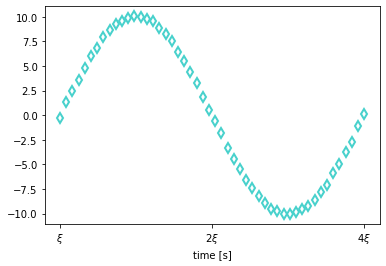

In [62]:
line = plt.plot(time, ts, **line_params)
plt.xlabel('time [s]')
plt.xticks([0, 5, 10], [r'$\xi$', r'2$\xi$', r'4$\xi$'])

In `matplotlib` many things can be achieved through functions (like `xticks`, `plot`, etc.) but to get the finest control over your visualization you'll need to use object properties. In general what you can do with functions can be done with the corresponding method of the right object. You can think of matplotlib visualizations as hierarchical constructs like trees with branches, sub-branches and leaves. It's actually quite simple when you get used to it: the root of the visualization is the figure, the figure contains axes, which are the spaces where we can plot lines, markers, etc. This is enough for now. You can create a figure and axes with the `plt.subplot()` function. You can also mix functions and objects in the code for a visualization (although it's better to keep the mixing at a minimum).

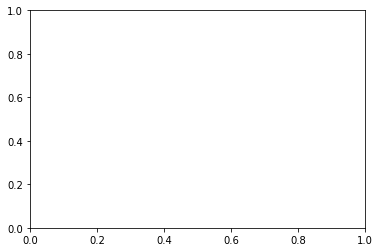

In [72]:
fig, ax = plt.subplots()

Of course there's nothing in it. Now we can use the methods of the axes object to achive the same result as before (methods to set properties of the axes usually begin with `set_`). 

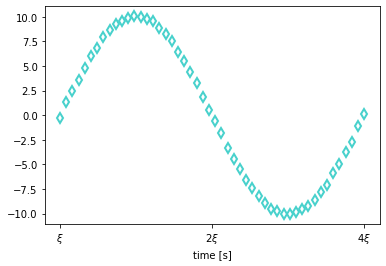

In [84]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_xticks([0, 5, 10])
ax.set_xticklabels([r'$\xi$', r'2$\xi$', r'4$\xi$']);

(0, 6)

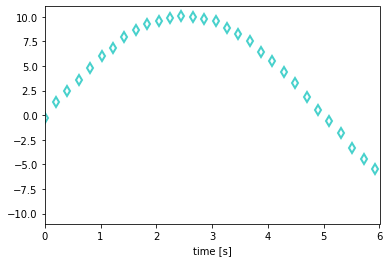

In [85]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_xlim([0, 6]);

Sometimes it's useful (in complex figures) to know the limits at some point in order to restore them later (this might be needed when some object added to the visualization changes the limits and we don't want it). 

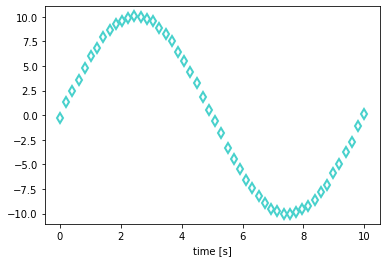

In [86]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
orig_xlims = ax.get_xlim()
ax.set_xlim([0, 6])
ax.set_xlim(orig_xlims);

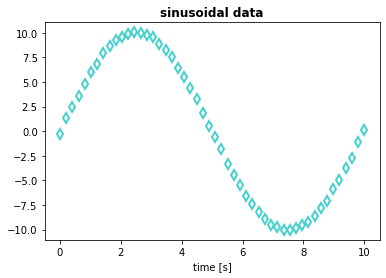

In [87]:
fig, ax = plt.subplots()
line = ax.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold');

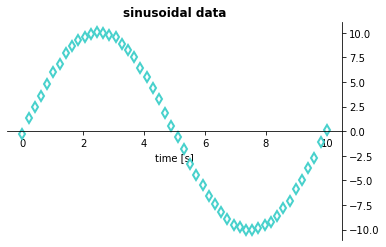

In [104]:
fig, ax = plt.subplots()
line = plt.plot(time, ts, **line_params)
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('right')
ax.spines['left'].set_position(('data', 10.5))

Sometimes you might just want to get the data without any reference point (ok, this one is really weird but you never know).

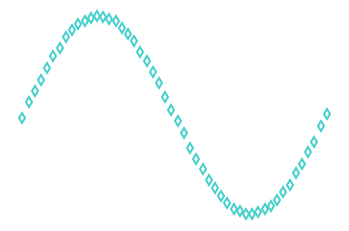

In [103]:
fig, ax = plt.subplots()
line = plt.plot(time, ts, **line_params)
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([]);

## legend

Let's plot two lines with different frequencies and also a reference line at the 0 on y-axis.

We now want to know which line is which. So we add a legend.

As you will see `matplotlib` tries its best to place the legend in a place where it doesn't interfere with the visualization but sometimes you just want the legend to be in another place. For this you can use the `loc` parameter possibly together with the `bbox_to_anchor` parameter. The `loc` parameters locates the legend in the given position of a bounding box (which by default is the axes). The `bbox_to_anchor` defines that bounding box to anchor the legend arbitrarily using the tuple `(x, y, width, height)`, where `(0, 0, 1, 1)` is the whole axes. So you can place the legend wherever you wish.

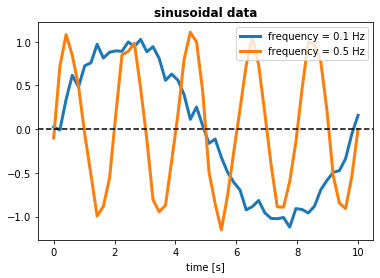

In [133]:
low_freq = 0.1
high_freq = 0.5
time, ts_lowfr = cn.make_syn_data(n=50, model='sine', f=low_freq)
time, ts_highfr = cn.make_syn_data(n=50, model='sine', f=high_freq)
fig, ax = plt.subplots()
line1 = ax.plot(time, ts_lowfr, linewidth=3, label='frequency = {:.1f} Hz'.format(low_freq))
line2 = ax.plot(time, ts_highfr, linewidth=3, label='frequency = {:.1f} Hz'.format(high_freq))
ref_line = ax.axhline(0, c='black', ls='--')
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.legend();
#ax.legend(loc='lower left', bbox_to_anchor=(1, .5, .5, .5));

## annotations

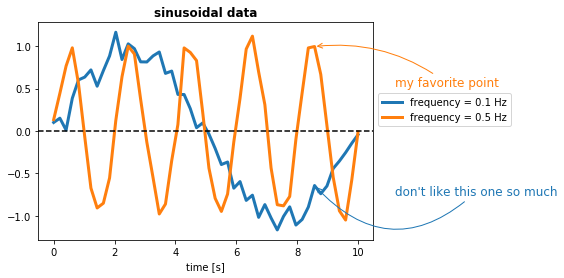

In [132]:
fig, ax = plt.subplots()
line1 = ax.plot(time, ts_lowfr, linewidth=3, label='frequency = {:.1f} Hz'.format(low_freq))
line2 = ax.plot(time, ts_highfr, linewidth=3, label='frequency = {:.1f} Hz'.format(high_freq))
xlims = ax.get_xlim()
ref_line = ax.axhline(0, c='black', ls='--')
ax.set_xlabel('time [s]')
ax.set_title('sinusoidal data', fontweight='bold')
ax.legend(loc='lower left', bbox_to_anchor=(1, .5, .5, .5))
ax.annotate('my favorite point', xy=(time[42], ts_highfr[42]),
             xycoords='data', xytext=(+80, -40), textcoords='offset points',
             fontsize=12, color=line2[0].get_color(), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2", color=line2[0].get_color()))
ax.annotate("don't like this one so much", xy=(time[42], ts_lowfr[42]),
             xycoords='data', xytext=(+80, -10), textcoords='offset points',
             fontsize=12, color=line1[0].get_color(), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5", color=line1[0].get_color()));


# Figures, subplots, axes

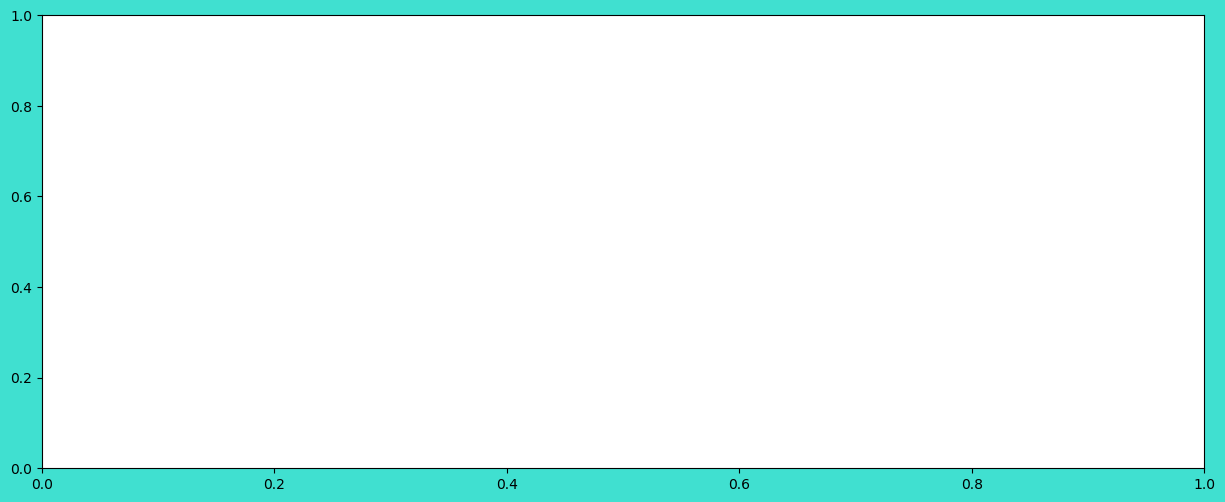

In [177]:
fig, ax = plt.subplots(figsize=[15, 6], dpi=100, facecolor='turquoise')

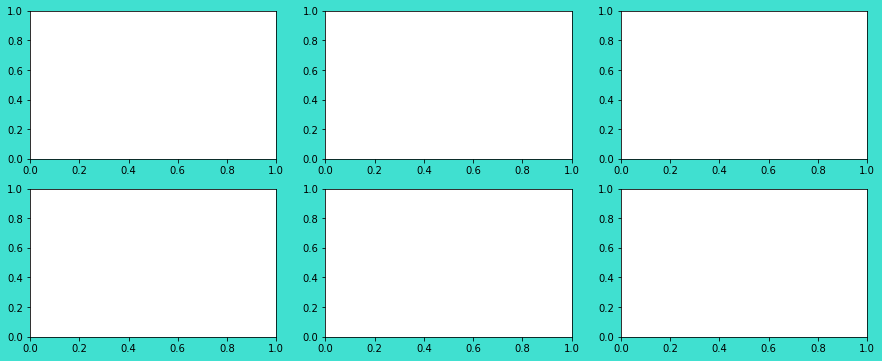

In [179]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[15, 6], facecolor='turquoise')

## link axis

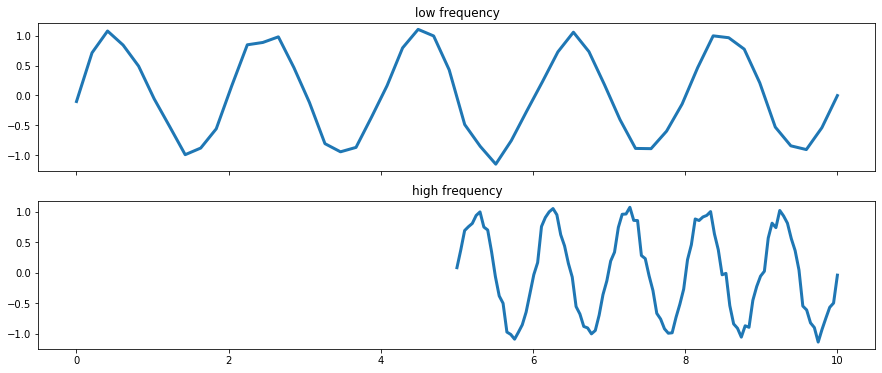

In [134]:
time_s, ts_short = cn.make_syn_data(n=100, model='sine', f=1, xlow=5)
fig, axs = plt.subplots(nrows=2, figsize=[15, 6], sharex=True)
axs[0].plot(time, ts_highfr, lw=3)
axs[1].plot(time_s, ts_short, lw=3)
axs[0].set_title('low frequency')
axs[1].set_title('high frequency');

## double axis

A double axis is useful when you want to show data that "live in the same space", for example are sampled in the same time period but are totally different quantities with different scales. In this case a second axes can be created that shares the bounding box with a preexisting axes and either the x or y axis.

For the sake of the example let's create another series of data with a different amplitude.

The main line to get the double axis here is just `ax2 = ax.twinx()`. The rest of the code is just to get a nicer correspondence of color between data and axis.

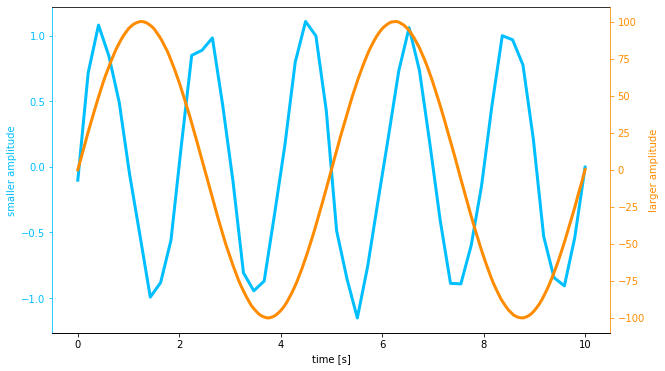

In [135]:
time_new, ts_new = cn.make_syn_data(n=200, model='sine', f=.2, a=100)

fig, ax = plt.subplots( figsize=[10, 6], sharex=True)
line1 = ax.plot(time, ts_highfr, lw=3, color='deepskyblue')
ax.set_xlabel('time [s]')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

line2 = ax2.plot(time_new, ts_new, lw=3, color='darkorange')
ax2_col = line2[0].get_color()
ax2.set_ylabel('larger amplitude', color=ax2_col)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=ax2_col, color=ax2_col)
ax_col = line1[0].get_color()
ax.set_ylabel('smaller amplitude', color=ax_col)  # we already handled the x-label with ax1
ax.tick_params(axis='y', labelcolor=ax_col, color=ax_col)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['left'].set_color(ax_col)
ax2.spines['right'].set_color(ax2_col)

## insets and fancy axes

You might want a smaller axes overlaying a larger one to plot a different view of the data, so called inset axes. This is typically used when there's interesting features of the data at two different scales and you want to show both. So the inset shows a zoomed in portion of the larger axes.

For this case the `inset_axes` method is very useful.

Let's first create a composite time series with two frequencies (the inset will show the higher frequency not clearly visible at the larger scale).

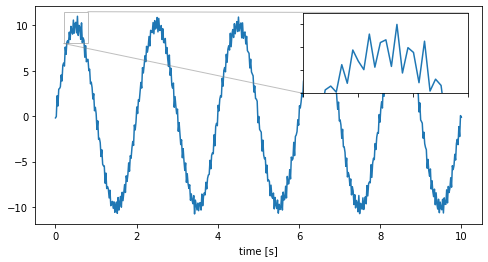

In [136]:
time, signal0 = cn.make_syn_data(n=500, model='sine', f=.5, a=10, b=0.2)
_, signal1 = cn.make_syn_data(n=500, model='sine', f=30, a=.8, b=0)
ts_comp = signal0 + signal1

fig, ax = plt.subplots(figsize=[8, 4])
ax.plot(time, ts_comp)
ax.set_xlabel('time [s]')

# inset axes....
axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
axins.plot(time, ts_comp)
# sub region of the original image
x1, x2, y1, y2 = .2, .8, 8, 11.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins);

Sometimes you might want to show a view of the data in the inset that is actually not a zoom-in. You can still use `inset_axes` but in order to show the portion of the larger axes the inset refers to you want to use `indicate_inset` method instead of `indicate_inset_zoom`.

To illustrate this let's say we want to show the histogram of values for different regions of the data.

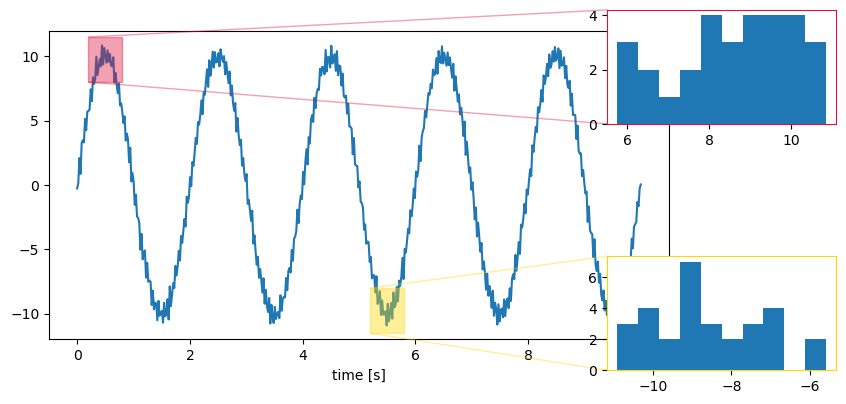

In [218]:
time, signal0 = cn.make_syn_data(n=500, model='sine', f=.5, a=10, b=0.2)
_, signal1 = cn.make_syn_data(n=500, model='sine', f=30, a=.8, b=0)
ts_comp = signal0 + signal1

fig, ax = plt.subplots(figsize=[8, 4])
ax.plot(time, ts_comp)
ax.set_xlabel('time [s]')

# inset axes....
axins = ax.inset_axes([.9, 0.7, 0.37, 0.37])
# create a mask to compute histogram for a subset of the data
mask = np.logical_and(time>=.2, time<.8)
axins.hist(ts_comp[mask])
# the Bbox we are using here comes from the subset of data used (with some arbitrariety on the y-axis) 
rect, connect = ax.indicate_inset([.2, 8, .6, 3.5], inset_ax=axins, transform=ax.transData,
                                  facecolor='crimson', edgecolor='crimson', alpha=0.4)
# change the color of spines to match that of indication
for key, spines in axins.spines.items():
    spines.set_color('crimson')
    
# inset axes....
axins2 = ax.inset_axes([.9, -0.1, 0.37, 0.37])
mask2 = np.logical_and(time>=5.2, time<5.8) 
axins2.hist(ts_comp[mask2])
rect, connect = ax.indicate_inset([5.2, -11.5, .6, 3.5], inset_ax=axins2, transform=ax.transData,
                                  facecolor='gold', edgecolor='gold', alpha=0.4)
for key, spines in axins2.spines.items():
    spines.set_color('gold')

As you can imaging this type of visualization can get quite messy very soon. It is in general suggested not to use too many insets and when they overlap too much with data to put them outside of the parent axes (or with few overlap as in the example above). Anyway with `inset_axes` you have a powerful tool to go anywhere from a classical inset to a separate (but easily linkable) subplot.

The last case where you might want to place axes in the figure at your will is a fancy one (although quite common in scientific papers). When there are data changing in three dimensions (typically video or sequence of images) and we don't want the reader to understand something about each element but just to get the idea of this sequence it's quite usual to have many overlapping axes (for example to show visual stimuli in an experiment).
Let's make an example with an random image downloaded from the internet.

In [114]:
import urllib.request
_ = urllib.request.urlretrieve('http://sanchez-vives.org/assets/img/people/labPeople-all.jpg', "labPeople-all.jpg")
image = plt.imread("labPeople-all.jpg")

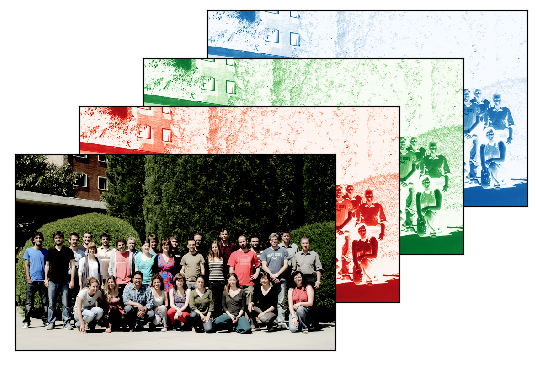

In [170]:
plt.axes([0.4,0.4,.5,.5])
plt.xticks([]), plt.yticks([])
plt.imshow(image[:, :, 2], cmap='Blues')

plt.axes([0.3,0.3,.5,.5])
plt.xticks([]), plt.yticks([])
plt.imshow(image[:, :, 1], cmap='Greens')

plt.axes([0.2,0.2,.5,.5])
plt.xticks([]), plt.yticks([])
plt.imshow(image[:, :, 0], cmap='Reds')

plt.axes([0.1,0.1,.5,.5])
plt.xticks([]), plt.yticks([])
plt.imshow(image);

Modifying the parameters of `axes` you can create you sequence of images with any given space between them to communicate the idea of 3D data.

## subplots grid

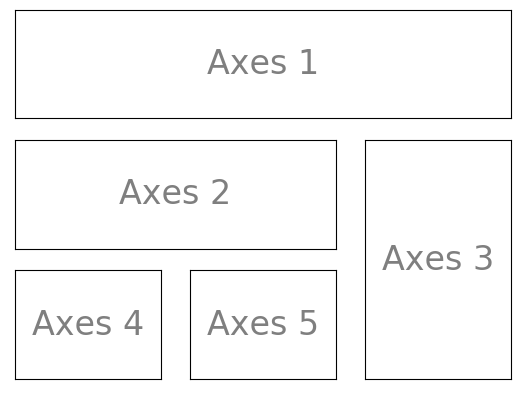

In [188]:
import matplotlib.gridspec as gridspec

G = gridspec.GridSpec(3, 3)

axes_1 = plt.subplot(G[0, :])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 1',ha='center',va='center',size=24,alpha=.5)

axes_2 = plt.subplot(G[1,:-1])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 2',ha='center',va='center',size=24,alpha=.5)

axes_3 = plt.subplot(G[1:, -1])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 3',ha='center',va='center',size=24,alpha=.5)

axes_4 = plt.subplot(G[-1,0])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 4',ha='center',va='center',size=24,alpha=.5)

axes_5 = plt.subplot(G[-1,-2])
plt.xticks([]), plt.yticks([])
plt.text(0.5,0.5, 'Axes 5',ha='center',va='center',size=24,alpha=.5);

Once you have your figure ready you might want to save it to disk. This is readly done with this method (there are a lot of figure formats available).

In [ ]:
fig.savefig('beautiful_figure.png', transparent=False, dpi=80, bbox_inches="tight")

# Drawing with style

As you have seen matplotlib figures are very customizable but it also takes quite some effort to change all parameters to your taste.

Fortunately there are some "styles" defined that alter figures parameters to get a defined look.

Let's try it out.

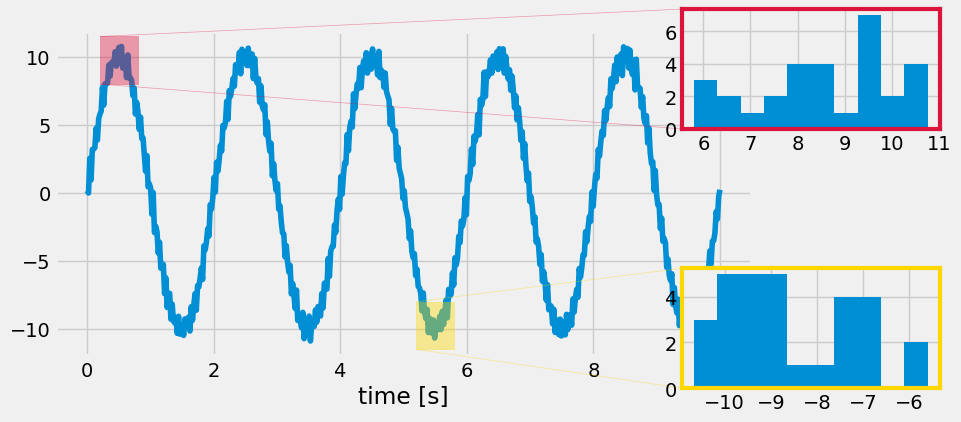

In [217]:
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize=[8, 4])
    ax.plot(time, ts_comp)
    ax.set_xlabel('time [s]')

    # inset axes....
    axins = ax.inset_axes([.9, 0.7, 0.37, 0.37])
    # create a mask to compute histogram for a subset of the data
    mask = np.logical_and(time>=.2, time<.8)
    axins.hist(ts_comp[mask])
    # the Bbox we are using here comes from the subset of data used (with some arbitrariety on the y-axis) 
    rect, connect = ax.indicate_inset([.2, 8, .6, 3.5], inset_ax=axins, transform=ax.transData,
                                      facecolor='crimson', edgecolor='crimson', alpha=0.4)
    # change the color of spines to match that of indication
    for key, spines in axins.spines.items():
        spines.set_color('crimson')

    # inset axes....
    axins2 = ax.inset_axes([.9, -0.1, 0.37, 0.37])
    mask2 = np.logical_and(time>=5.2, time<5.8) 
    axins2.hist(ts_comp[mask2])
    rect, connect = ax.indicate_inset([5.2, -11.5, .6, 3.5], inset_ax=axins2, transform=ax.transData,
                                      facecolor='gold', edgecolor='gold', alpha=0.4)
    for key, spines in axins2.spines.items():
        spines.set_color('gold')
    


There are many styles available. You can check them out from this list.

In [144]:
print(plt.style.available)

['dark_background', 'seaborn-darkgrid', 'classic', 'seaborn-ticks', 'ggplot', '_classic_test', 'seaborn-talk', 'seaborn-dark', 'seaborn-bright', 'Solarize_Light2', 'fivethirtyeight', 'seaborn-pastel', 'grayscale', 'seaborn', 'seaborn-dark-palette', 'bmh', 'seaborn-notebook', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-poster', 'seaborn-paper', 'seaborn-muted', 'seaborn-white', 'seaborn-colorblind', 'fast', 'tableau-colorblind10']


The `with` clause in previous code cell sets the style context only for that figure. If you want to apply a style to every figure you can use `plt.style.use('fivethirtyeight')`.

In IPython based environments (like the notebooks) sometimes it might be hard to revert the style to the defauls. However you can always go back to default figure parameters with

In [216]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# seaborn

Seaborn is a library that will make you visualization work easier (and nicer).

It's built on top of matplotlib. This means all you can do with seaborn you can do it with matplotlib but seaborn interface is easier to use (at least if you are familiar with pandas).

Seaborn can also set styles but allows only five styles: *darkgrid*, *whitegrid*, *dark*, *white* and *ticks*.

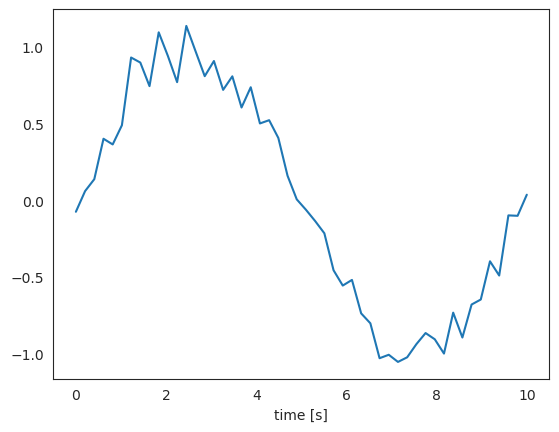

In [219]:
import seaborn as sns

with sns.axes_style('white'):
    time, ts = cn.make_syn_data(n=50, model='sine', f=.1)
    plt.plot(time, ts)
    plt.xlabel('time [s]')

Usually you want the scaling of your text, line widths and other graphical element to change depending on the aim of your visualization.

For this seaborn provides four contexts (from smaller to larger scale): *paper*, *notebook*, *talk*, and *poster*.

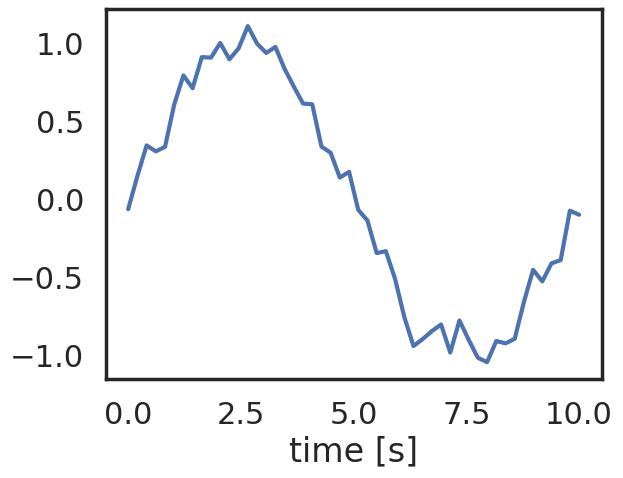

In [211]:
sns.set_context("poster")
time, ts = cn.make_syn_data(n=50, model='sine', f=.1)
plt.plot(time, ts)
plt.xlabel('time [s]');

# Scatter plot

# Bar plot

# Contour plot

# imshow

# Pie chart

# Violins and box plots

# Summary of good viz practices